In [8]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import nltk
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import pickle
from sklearn.linear_model import Ridge
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt

Импортируем модули и frameworks для работы


In [9]:
df = pd.read_csv('bbc-news-data.csv', sep = '\t')
df

,category,filename,title,content
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...
...,...,...,...,...
2220,tech,397.txt,BT program to beat dialler scams,BT is introducing two initiatives to help bea...
2221,tech,398.txt,Spam e-mails tempt net shoppers,Computer users across the world continue to i...
2222,tech,399.txt,Be careful how you code,A new European directive could put software w...
2223,tech,400.txt,US cyber security chief resigns,The man making sure US computer networks are ...


Загружаем датасет

In [ ]:
df = df.drop(columns = ["filename"], axis = 1)

Удаляем столбец filename, тк он не несет нам никакой пользы, это всего лишь нумерация тектовых файлов

In [ ]:
df

,category,title,content
0,business,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,business,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...
2,business,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...
3,business,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...
4,business,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...
...,...,...,...
2220,tech,BT program to beat dialler scams,BT is introducing two initiatives to help bea...
2221,tech,Spam e-mails tempt net shoppers,Computer users across the world continue to i...
2222,tech,Be careful how you code,A new European directive could put software w...
2223,tech,US cyber security chief resigns,The man making sure US computer networks are ...


In [ ]:
def get_lemmatized_text(corpus):
    from nltk.stem import WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()
    return [' '.join([lemmatizer.lemmatize(word) for word in title.split()]) for title in corpus]

df['title'] = get_lemmatized_text(df['title'])
df

,category,title,content
0,business,Ad sale boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,business,Dollar gain on Greenspan speech,The dollar has hit its highest level against ...
2,business,Yukos unit buyer face loan claim,The owners of embattled Russian oil giant Yuk...
3,business,High fuel price hit BA's profit,British Airways has blamed high fuel prices f...
4,business,Pernod takeover talk lift Domecq,Shares in UK drinks and food firm Allied Dome...
...,...,...,...
2220,tech,BT program to beat dialler scam,BT is introducing two initiatives to help bea...
2221,tech,Spam e-mail tempt net shopper,Computer users across the world continue to i...
2222,tech,Be careful how you code,A new European directive could put software w...
2223,tech,US cyber security chief resigns,The man making sure US computer networks are ...


In [ ]:
def get_lemmatized_text(corpus):
    from nltk.stem import WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()
    return [' '.join([lemmatizer.lemmatize(word) for word in content.split()]) for content in corpus]

df['content'] = get_lemmatized_text(df['content'])
df

,category,title,content
0,business,Ad sale boost Time Warner profit,Quarterly profit at US medium giant TimeWarner...
1,business,Dollar gain on Greenspan speech,The dollar ha hit it highest level against the...
2,business,Yukos unit buyer face loan claim,The owner of embattled Russian oil giant Yukos...
3,business,High fuel price hit BA's profit,British Airways ha blamed high fuel price for ...
4,business,Pernod takeover talk lift Domecq,Shares in UK drink and food firm Allied Domecq...
...,...,...,...
2220,tech,BT program to beat dialler scam,BT is introducing two initiative to help beat ...
2221,tech,Spam e-mail tempt net shopper,Computer user across the world continue to ign...
2222,tech,Be careful how you code,A new European directive could put software wr...
2223,tech,US cyber security chief resigns,The man making sure US computer network are sa...


Делаем лематизацию слов в столбцах title и content

In [ ]:
html_pattern = re.compile('<.*?>')
df['title'] = df['title'].replace(html_pattern, '')
df['content'] = df['content'].replace(html_pattern, '')
df

,category,title,content
0,business,Ad sale boost Time Warner profit,Quarterly profit at US medium giant TimeWarner...
1,business,Dollar gain on Greenspan speech,The dollar ha hit it highest level against the...
2,business,Yukos unit buyer face loan claim,The owner of embattled Russian oil giant Yukos...
3,business,High fuel price hit BA's profit,British Airways ha blamed high fuel price for ...
4,business,Pernod takeover talk lift Domecq,Shares in UK drink and food firm Allied Domecq...
...,...,...,...
2220,tech,BT program to beat dialler scam,BT is introducing two initiative to help beat ...
2221,tech,Spam e-mail tempt net shopper,Computer user across the world continue to ign...
2222,tech,Be careful how you code,A new European directive could put software wr...
2223,tech,US cyber security chief resigns,The man making sure US computer network are sa...


In [ ]:
df['content'] = df['content'].str.replace('''["\((.*)\)']''', '', regex=True)
df['title'] = df['title'].str.replace('''["\((.*)\)']''', '', regex=True)
df

,category,title,content
0,business,Ad sale boost Time Warner profit,Quarterly profit at US medium giant TimeWarner...
1,business,Dollar gain on Greenspan speech,The dollar ha hit it highest level against the...
2,business,Yukos unit buyer face loan claim,The owner of embattled Russian oil giant Yukos...
3,business,High fuel price hit BAs profit,British Airways ha blamed high fuel price for ...
4,business,Pernod takeover talk lift Domecq,Shares in UK drink and food firm Allied Domecq...
...,...,...,...
2220,tech,BT program to beat dialler scam,BT is introducing two initiative to help beat ...
2221,tech,Spam e-mail tempt net shopper,Computer user across the world continue to ign...
2222,tech,Be careful how you code,A new European directive could put software wr...
2223,tech,US cyber security chief resigns,The man making sure US computer network are sa...


In [ ]:
df['content'] = df['content'].str.replace('[0-9]', '', regex=True)
df['title'] = df['title'].str.replace('[0-9]', '', regex=True)
df

,category,title,content
0,business,Ad sale boost Time Warner profit,Quarterly profit at US medium giant TimeWarner...
1,business,Dollar gain on Greenspan speech,The dollar ha hit it highest level against the...
2,business,Yukos unit buyer face loan claim,The owner of embattled Russian oil giant Yukos...
3,business,High fuel price hit BAs profit,British Airways ha blamed high fuel price for ...
4,business,Pernod takeover talk lift Domecq,Shares in UK drink and food firm Allied Domecq...
...,...,...,...
2220,tech,BT program to beat dialler scam,BT is introducing two initiative to help beat ...
2221,tech,Spam e-mail tempt net shopper,Computer user across the world continue to ign...
2222,tech,Be careful how you code,A new European directive could put software wr...
2223,tech,US cyber security chief resigns,The man making sure US computer network are sa...


убираем html теги, различные, ненужные нам символы с помощью метода replace и регулярных выражений, а также цифры
 

In [ ]:
df['content'] = df['content'].apply(lambda x: x.lower())
df['title'] = df['title'].apply(lambda x: x.lower())
df

,category,title,content
0,business,ad sale boost time warner profit,quarterly profit at us medium giant timewarner...
1,business,dollar gain on greenspan speech,the dollar ha hit it highest level against the...
2,business,yukos unit buyer face loan claim,the owner of embattled russian oil giant yukos...
3,business,high fuel price hit bas profit,british airways ha blamed high fuel price for ...
4,business,pernod takeover talk lift domecq,shares in uk drink and food firm allied domecq...
...,...,...,...
2220,tech,bt program to beat dialler scam,bt is introducing two initiative to help beat ...
2221,tech,spam e-mail tempt net shopper,computer user across the world continue to ign...
2222,tech,be careful how you code,a new european directive could put software wr...
2223,tech,us cyber security chief resigns,the man making sure us computer network are sa...


приводим к нижнему регистру наши столбцы title and content

In [ ]:
count = CountVectorizer(stop_words="english")
title = count.fit_transform(list(df['title']))
content = count.fit_transform(list(df['content']))
df.title = title.toarray()
df.content = content.toarray()

ДЕЛАЕМ ВЕКТОРИЗАЦИЮ для title and content и и убираем стоп- слова с помощью метода CountVectorizer() в sklearn. записываем получившиеся массивы в наш датафрэйм

In [ ]:
labelencoder = LabelEncoder()
df['category'] = labelencoder.fit_transform(df['category'])
df

,category,title,content
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
2220,4,0,0
2221,4,0,0
2222,4,0,0
2223,4,0,0


с помощью LabelEncoder() кодируем столбец category

In [10]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = (stopwords.words('english')) # список стоп-слов
vectorizer = TfidfVectorizer(stop_words=stop_words)
X = vectorizer.fit_transform(df.content.values.astype('U'))
y = df['category'].values
le = preprocessing.LabelEncoder()
le.fit(df.category)
df.category = le.transform(df.category)
y = df.category
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Опять импортируем модули и фреймворки, скачиваем стоп-слова, делаем векторизацию с TfidfVectorizer(), в y передаем наш таргет(category),в x - независимые переменные, кодируем category и разбиваем наш датафрэйм на обучающую и тестовую выборки.

In [11]:
knc = KNeighborsClassifier()
knc.fit(X_train, y_train)
y_pred = knc.predict(X_test)
accuracy_score(y_pred,y_test)

0.9387755102040817

Создаю модель KNeighborsClassifier(), обучаю на обучающих данных и делаю прогноз, проверяю точность модели с accuracy_score

In [12]:
parameters = {'n_neighbors': [3,5,7],
             'weights': ['uniform','distanse'],
             'metric' : ['chebyshev', 'minkowski', 'euclidean']}

создаю словарь с гиперпараметрами для KNN


In [13]:
knn = GridSearchCV(knc, parameters)
knn.fit(X_train, y_train)
print(knn.best_params_)
print('best_score_ = 0.9402684563758388')

{'metric': 'minkowski', 'n_neighbors': 7, 'weights': 'uniform'}
best_score_ = 0.9402684563758388


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
60 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py", line 215, in fit
    return self._fit(X, y)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_base.py", line 562, in _fit
    raise ValueError(
ValueError: Metric 'chebyshev' not valid for sparse input. Use sorted(sk

создаю модель GridSearchCV(), в качестве параметров передаю модель KNN и словарь параметров, на выходе получаю наилучшие параметры,которые предложила модель GridSearchCV и оцениваю точность модели

In [14]:
knc1 = KNeighborsClassifier(metric = 'minkowski', n_neighbors = 7, weights= 'uniform')
knc1.fit(X_train, y_train)
y_pred1 = knc1.predict(X_test)
accuracy_score(y_pred1,y_test)

0.9401360544217687

переобучаю модель с параметрами, предложенными GridSearchCV и еще раз оцениваю точность модели(можно наблюдать, что оценка возросла)

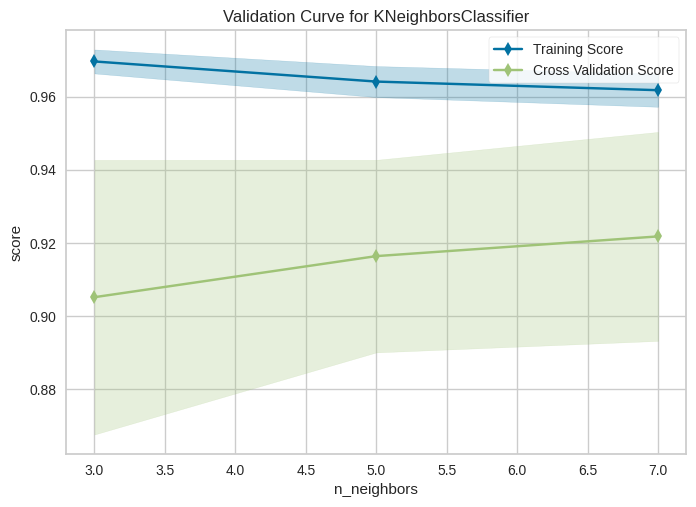

TypeError: ignored

In [21]:
parameter_range = pd.Series([3, 5, 7])
train_score, test_score = validation_curve(knc1, X, y,
                                       param_name = "n_neighbors",
                                       param_range = parameter_range,
                                        cv = 5, scoring = "accuracy")
 
mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)
 
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)
 
plt.plot(parameter_range, mean_train_score,
     label = "Training Score", color = 'b')
plt.plot(parameter_range, mean_test_score,
   label = "Cross Validation Score", color = 'g')
 
plt.title("Validation Curve with KNN Classifier")
plt.xlabel("Number of Neighbours")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

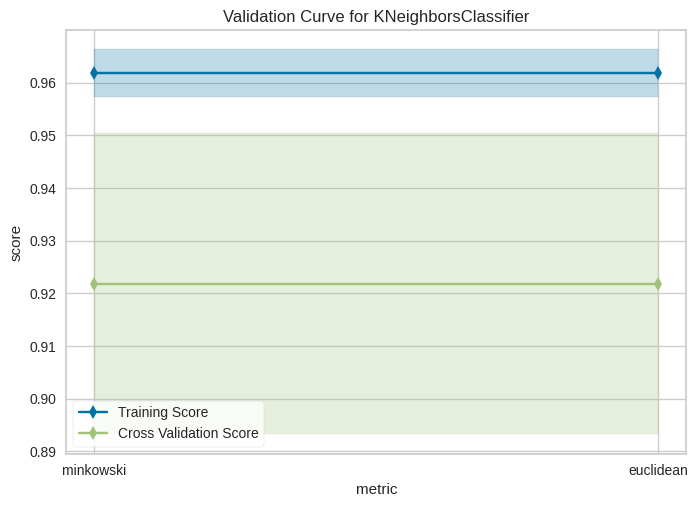

TypeError: ignored

In [22]:
parameter_range = pd.Series(['chebyshev', 'minkowski', 'euclidean'])
train_score, test_score = validation_curve(knc1, X, y,
                                       param_name = "metric",
                                       param_range = parameter_range,
                                        cv = 5, scoring = "accuracy")
 
mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)
 
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)
 
plt.plot(parameter_range, mean_train_score,
     label = "Training Score", color = 'b')
plt.plot(parameter_range, mean_test_score,
   label = "Cross Validation Score", color = 'g')
 
plt.title("Validation Curve with KNN Classifier")
plt.xlabel("Number of Neighbours")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

Визуализирую кривую валидации: создаю series со значениями гиперпараметра, создаю модель validation_curve(), в качестве параметров передаю обученую модель классификации,независимые переменные,таргет, название гиперпараметра, объект series, показатель вычисления оценки и кол-во разделений для перекрестной проверки. Далее нахожу среднее значение и стандартное отклонение обучающей и тестовой оценки. И визуализирую с помощью matplotlib. По графику можно увидеть,что оценщик работает хорошо, тк. и оценка обучения,и оценка валидации достаточно высоки.
В противном случае, если бы оценка обучения, и оценка валидации были бы низкие, оценщик не соответствует требованиям. Если оценка обучения высока, а оценка валидации низка, оценщик переобучен.
